In [5]:
import tensorflow as tf

In [6]:
print(tf.__version__)

2.0.0-rc1


In [3]:
import keras

Using TensorFlow backend.


In [7]:
import numpy as np

In [8]:
x = [2,4,6,8]
y = [81,93,91,97]

In [9]:
mx = np.mean(x)
my = np.mean(y)

In [10]:
divisor = sum([(i - mx)**2 for i in x])

In [11]:
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x,mx,y,my)

In [12]:
a = dividend / divisor

In [13]:
b = my - (mx*a)

In [14]:
a,b

(2.3, 79.0)

In [15]:
fake_a_b = [3,76]

In [16]:
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

In [17]:
def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

In [18]:
def mse(y_hat,y):
    return ((y_hat-y)**2).mean()

In [20]:
def mse_val(predict_result,y):
    return mse(np.array(predict_result),np.array(y))

In [21]:
predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제 점수 = %.f, 예측점수 = %.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제 점수 = 81, 예측점수 = 82
공부시간=4, 실제 점수 = 93, 예측점수 = 88
공부시간=6, 실제 점수 = 91, 예측점수 = 94
공부시간=8, 실제 점수 = 97, 예측점수 = 100


In [24]:
x_data = np.array(x)
y_data = np.array(y)

In [25]:
y_pred = a*x_data + b
error = y_data - y_pred

a_diff = -(2/len(x_data))*sum(x_data * (error))
b_diff = -(2/len(x_data))*sum(y_data - y_pred)

In [27]:
lr=0.05

In [28]:
a = a-lr*a_diff
b = b-lr*b_diff

In [29]:
import matplotlib.pyplot as plt

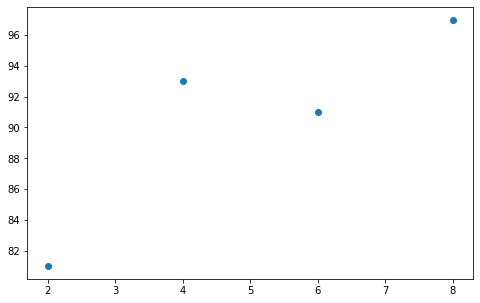

In [30]:
plt.figure(figsize = (8,5))
plt.scatter(x,y)
plt.show()

In [33]:
epochs = 2001
a=0
b=0

In [34]:
for i in range(epochs):
    y_pred = a*x_data +b
    error = y_data-y_pred
    a_diff = -(1/len(x_data)) * sum(x_data * (error))
    b_diff = -(1/len(x_data)) * sum(y_data - y_pred)
    
    a = a-lr*a_diff
    b = b-lr*b_diff
    
    if i % 100 == 0:
        print("epochs=%.f, 기울기=%.f, 절편=%.04f" % (i,a,b))


epochs=0, 기울기=23, 절편=4.5250
epochs=100, 기울기=8, 절편=45.3932
epochs=200, 기울기=5, 절편=64.1094
epochs=300, 기울기=3, 절편=72.4022
epochs=400, 기울기=3, 절편=76.0766
epochs=500, 기울기=3, 절편=77.7047
epochs=600, 기울기=2, 절편=78.4261
epochs=700, 기울기=2, 절편=78.7457
epochs=800, 기울기=2, 절편=78.8873
epochs=900, 기울기=2, 절편=78.9501
epochs=1000, 기울기=2, 절편=78.9779
epochs=1100, 기울기=2, 절편=78.9902
epochs=1200, 기울기=2, 절편=78.9957
epochs=1300, 기울기=2, 절편=78.9981
epochs=1400, 기울기=2, 절편=78.9991
epochs=1500, 기울기=2, 절편=78.9996
epochs=1600, 기울기=2, 절편=78.9998
epochs=1700, 기울기=2, 절편=78.9999
epochs=1800, 기울기=2, 절편=79.0000
epochs=1900, 기울기=2, 절편=79.0000
epochs=2000, 기울기=2, 절편=79.0000


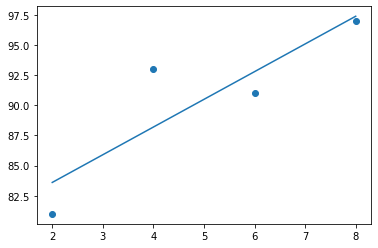

In [35]:
y_pred = a*x_data + b
plt.scatter(x,y)
plt.plot([min(x_data),max(x_data)],[min(y_pred),max(y_pred)])
plt.show()

In [36]:
# 독립변수2개
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

In [37]:
from mpl_toolkits import mplot3d

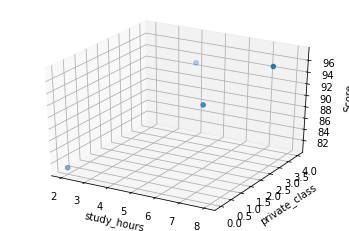

In [39]:
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.scatter(x1,x2,y)
plt.show()